In [1]:
# Capstone Project  1 Part B Regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import warnings
scaler = StandardScaler()
warnings.filterwarnings('ignore')

# Read and preview the dataset
df=pd.read_csv('data/SP/kc_house_data.csv')
print(df.shape)
df.head(2)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [2]:
# A. Data Cleaning 

# --- 1. Check if any missing values in dataset ---
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
# A. Data Cleaning 

# --- 2. Identify the data types of each column ---
# Drop ID, date features which are not required 
 
df.drop(['id','date'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [4]:
# A. Data Cleaning 

# --- 3. Descriptive statistical summary  ---
# Bedrooms, sqft_living has a wide range from min - max which suggests outliers. 

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# B. Data Curation 

# --- 1. Identify the unique categories of interested columns ---

# Categorical features 
print(" -------- Categorical features -------")
print("Types of View : " + f"{df['view'].unique()}") # 0 is the worst and 4 is the best
print("Types of Grade : " + f"{df['grade'].unique()}") #1 is the worst and 13 is the best
print("Types of Conditions : " + f"{df['condition'].unique()}") #1 is the worst and 5 is the best
print()
# Numerical features 
print("----------- Numerical features -----------")
print("No of Bedrooms : " + f"{df['bedrooms'].unique()}")
print("No of types of Bedrooms :" + f"{len(np.unique(df['bedrooms']))}")
print("No of Bathrooms : " + f"{df['bathrooms'].unique()}")
print("No of types of Bathrooms :" + f"{len(np.unique(df['bathrooms']))}")

 -------- Categorical features -------
Types of View : [0 3 4 2 1]
Types of Grade : [ 7  6  8 11  9  5 10 12  4  3 13  1]
Types of Conditions : [3 5 4 1 2]

----------- Numerical features -----------
No of Bedrooms : [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
No of types of Bedrooms :13
No of Bathrooms : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
No of types of Bathrooms :30


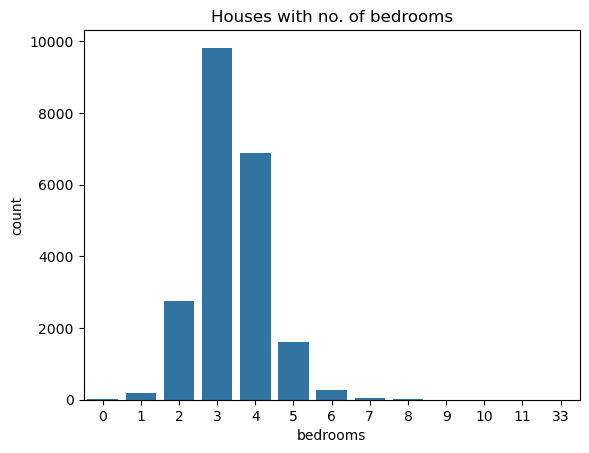

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
Bedrooms 3 45.45%
Bedrooms 4  31.84%


In [6]:
# B. Data Curation

# --- 2. Show and count no. of Condition ---  

sns.countplot(x='bedrooms', data=df)
plt.title('Houses with no. of bedrooms')
plt.show()
status = df['bedrooms'].value_counts()
print(status)
C3=9824/21613 #Total rows in df = 21613
C4=6882/21613
print(f"Bedrooms 3 {C3:.2%}")
print(f"Bedrooms 4  {C4:.2%}")
# 75% of houses have 3 or 4 bedrooms;
# 90% of houses are in condition 3 or 4, with two-thirds are in condition 3 (average maintained)

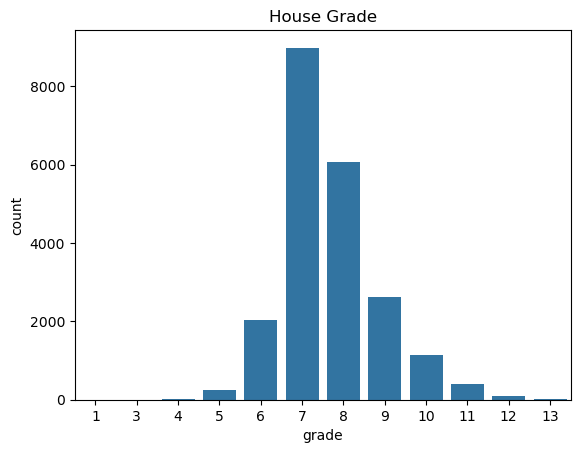

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
Grade 7 41.55%
Grade 8  28.08%


In [7]:
# B. Data Curation

# --- 3. Show and count no. of Grade ---  

sns.countplot(x='grade', data=df)
plt.title('House Grade')
plt.show()
status = df['grade'].value_counts()
print(status)
G7=8981/21613 #Total rows in df = 21613
G8=6068/21613
print(f"Grade 7 {G7:.2%}")
print(f"Grade 8  {G8:.2%}")
# 70% of houses are in Grade 7 or 8 o/w ~ 40% are in Grade 7. 

In [8]:
# B. Data Curation

# --- 4. Applied Log to prices ---  
# Apply Log on to price to achieve normal distribution 

df1=df.copy()
df1['log_price']=np.log(df1['price'])
df1.drop('price',inplace=True,axis=1)
df1.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

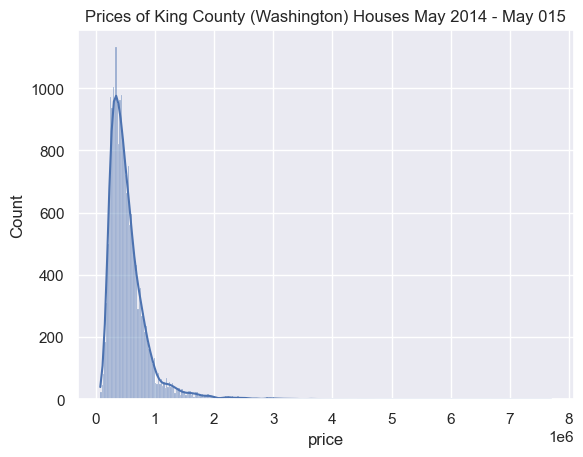

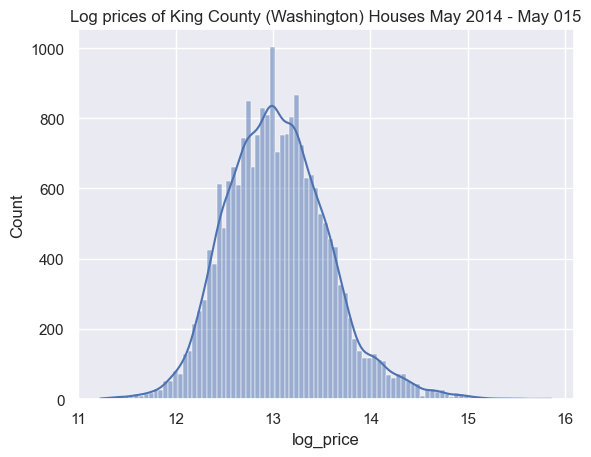

In [9]:
# B. Data Curation

# --- 5. Plot Graph of price and Log price to show Distribution ---  

# Plot with acutal prices 
sns.set_theme(style="darkgrid")
sns.histplot(df['price'], kde=True)
plt.title('Prices of King County (Washington) Houses May 2014 - May 015', y= 1.0)
plt.show()

# Plot with log prices - normal distribution 
sns.set_theme(style="darkgrid")
sns.histplot(df1['log_price'], kde=True)
plt.title('Log prices of King County (Washington) Houses May 2014 - May 015', y= 1.0)
plt.show()

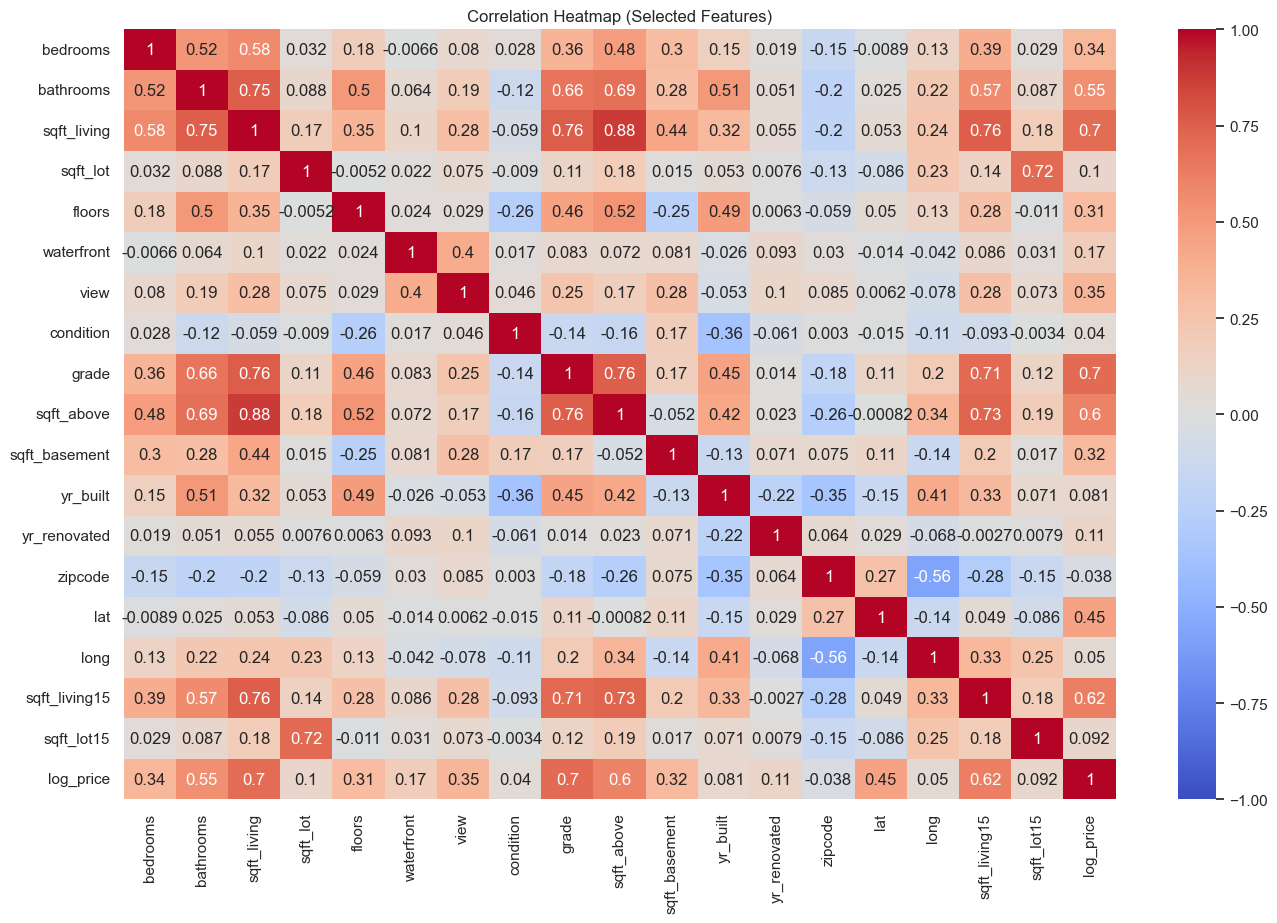

(21613, 19)

In [10]:
#C. Features Selection 

# --- 1. Correlation Heatmap for all features --- 

corr_matrix = df1.corr()
plt.figure(figsize=(16, 10)) #change later
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()
df1.shape

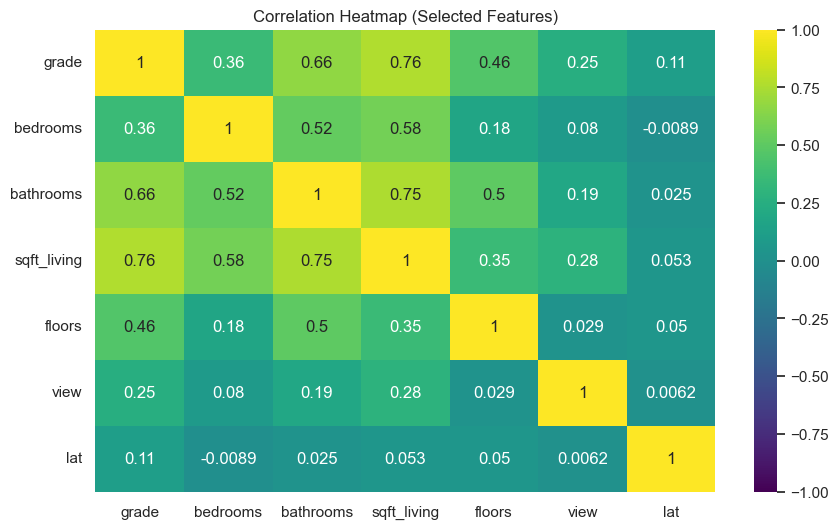

In [11]:
# C. Features Selection 

# --- 2. Correlation Heatmap for features with meaningful correlation ratio excl. log price --- 
#  Check for collinearity (coefficients > 0.7 or 0.8 suggest concern)

# --- ASSUMPTIONS ---
# "sqft_" features exhibited strong collinearity; select one will suffice. 
# bathrooms and sqft_living have strong collinearity as well, choose bedrooms instead. 
# Features with correlation below 0.20 are not considered. 

selected_cols_1 = ['grade','bedrooms','bathrooms','sqft_living','floors','view','lat',]  
corr_matrix1 = df1[selected_cols_1].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix1, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()

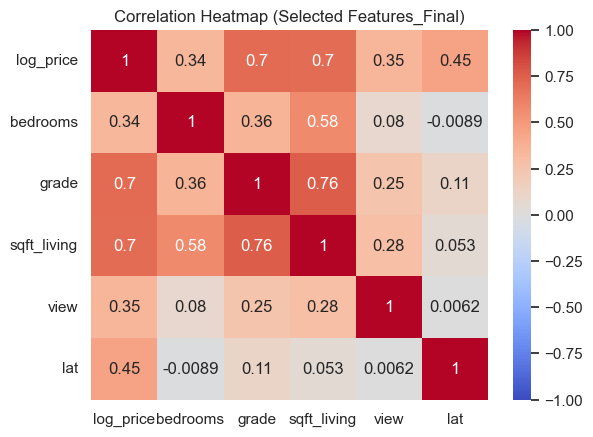

In [12]:
# C. Features Selection 

# --- 3. Correlation Heatmap for selected features with log price --- 
#  Check for collinearity (coefficients > 0.7 or 0.8 suggest concern)
#  Retain bedrooms, grade, sqft_living, lat, view (Total: 5) >> bathrooms have strong correlation to sqft_living (0.75)

selected_cols_2 = ['log_price','bedrooms','grade','sqft_living','view','lat']  
corr_matrix1 = df1[selected_cols_2].corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Selected Features_Final)")
plt.show()

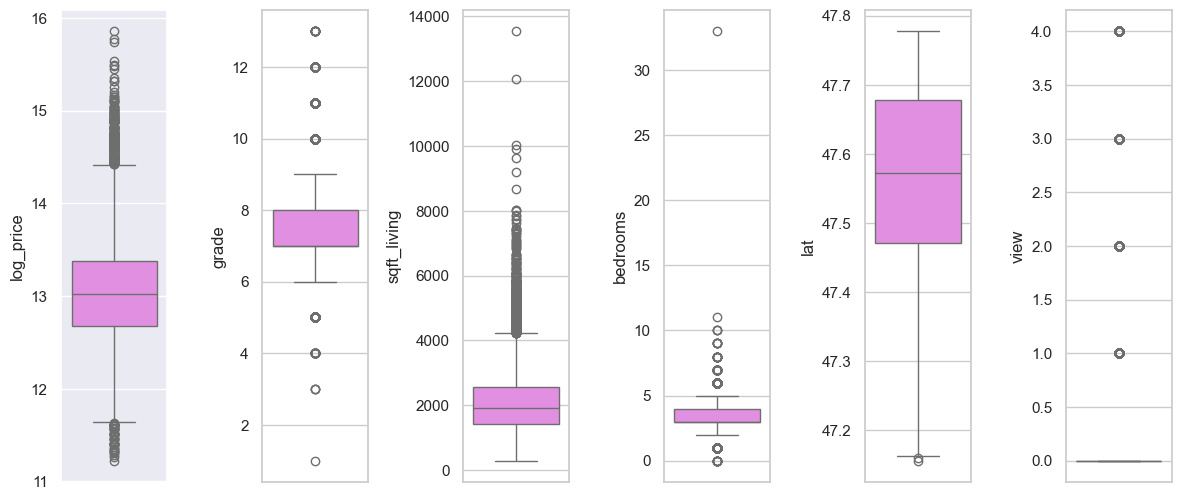

In [13]:
# D. Exploratory data analysis

# --- 1. Boxplot on selected features and log price --- 

df1_box = df1[['log_price','grade','sqft_living','bedrooms','lat','view']] 
l = df1_box.columns.values
no_cols=8
total_plots = len(l)

#no_rows = math.ceil(total_plots / no_cols)
no_rows=round(len(l)-1/no_cols)
grid_rows = no_rows
plt.figure(figsize=(2*no_cols, 5 * grid_rows))

for i in range (0,total_plots):
    plt.subplot(grid_rows, no_cols, i + 1)
    #plt.subplot(grid_rows + 1,no_cols,i+l)
    sns.set_style('whitegrid')
    sns.boxplot(df1[l[i]],color='violet',orient='v')
    plt.tight_layout()


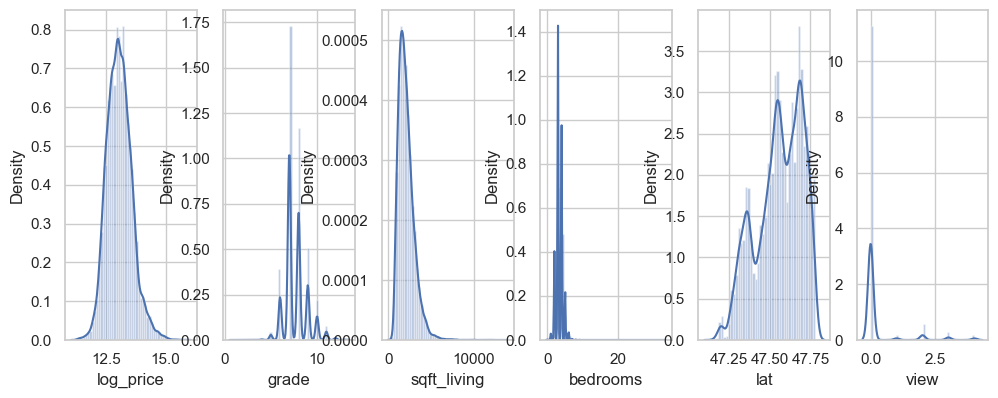

In [14]:
# D. Exploratory data analysis

# --- 2. Histogram on selected features and log price --- 

plt.figure(figsize=(2 * no_cols, 5 * grid_rows))
for i in range (0,total_plots):
    plt.subplot(grid_rows, no_cols, i + 1)
    sns.distplot(df1_box[l[i]],kde=True)

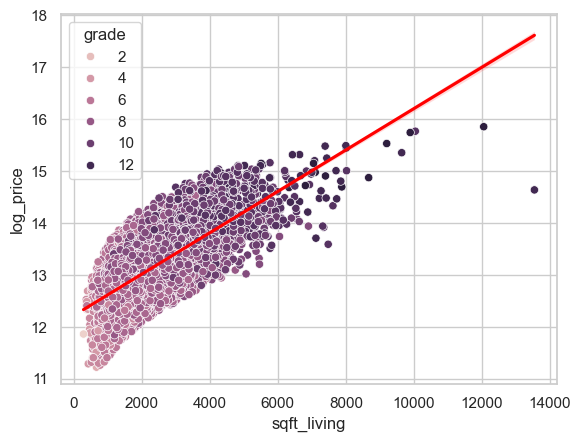

In [15]:
# D. Exploratory data analysis

# --- 3. Scatter plot on  sqft-living and log price --- 
# Established positive linear relationship (red line) between sqft and price
# Higher grades are dispered mainly on centre or right of the graph, forming a right bending curve 
# There to have appears outliers from sqft_living at 12000 and 14000

selected_cols = ['log_price', 'grade', 'sqft_living']
sns.scatterplot(
    data=df1[selected_cols], # Use the filtered data subset for the scatter
    x='sqft_living',
    y='log_price',
    hue='grade'
)

sns.regplot(
    data=df1[selected_cols], 
    x='sqft_living',
    y='log_price',
    scatter=False, # Plot only the line, not the scatter points
    color='red' # Make the line stand out
)
plt.show()

<Axes: xlabel='bedrooms', ylabel='log_price'>

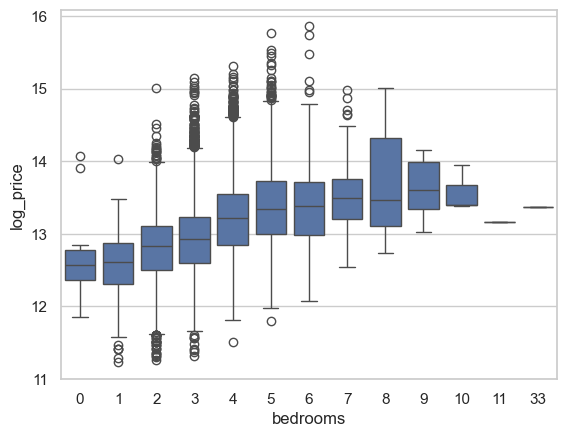

In [16]:
# D. Exploratory data analysis

# --- 4. Box plot on bedrooms against log_price --- 
# Outliers observed for house with 11, 33 bedrooms

sns.boxplot(x='bedrooms',y='log_price',data=df1,showfliers=True)

In [17]:
# D. Exploratory data analysis

# --- 5. Outliers --- 
# Identified number of outliers for bedrooms at quantile 0.02 and 0.98

Q1=df1['bedrooms'].quantile(0.02)
Q3=df1['bedrooms'].quantile(0.98)
IQR=Q3-Q1
outliers_bed=df1.loc[(df1['bedrooms']<(Q1-1.5*IQR)) | (df1['bedrooms']>(Q3+1.5*IQR))]

# Print outliers - bed 
print(df1.shape)
print(f"Shape of outlier beds removed: {outliers_bed.shape}")
outliers_bed.head(5)

# Identified number of outliers for sqft_living at quantile 0.05 and 0.95

Q1=df1['sqft_living'].quantile(0.02)
Q3=df1['sqft_living'].quantile(0.98)
IQR=Q3-Q1
outliers_sqft=df1.loc[(df1['sqft_living']<(Q1-1.5*IQR)) | (df1['sqft_living']>(Q3+1.5*IQR))]

print(f"Shape of outlier sqft_living removed: {outliers_sqft.shape}")
outliers_sqft.head(4)


(21613, 19)
Shape of outlier beds removed: (5, 19)
Shape of outlier sqft_living removed: (4, 19)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
3914,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,15.770310
7252,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,15.856731
9254,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,15.744856
12777,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,14.639686


(21604, 6)

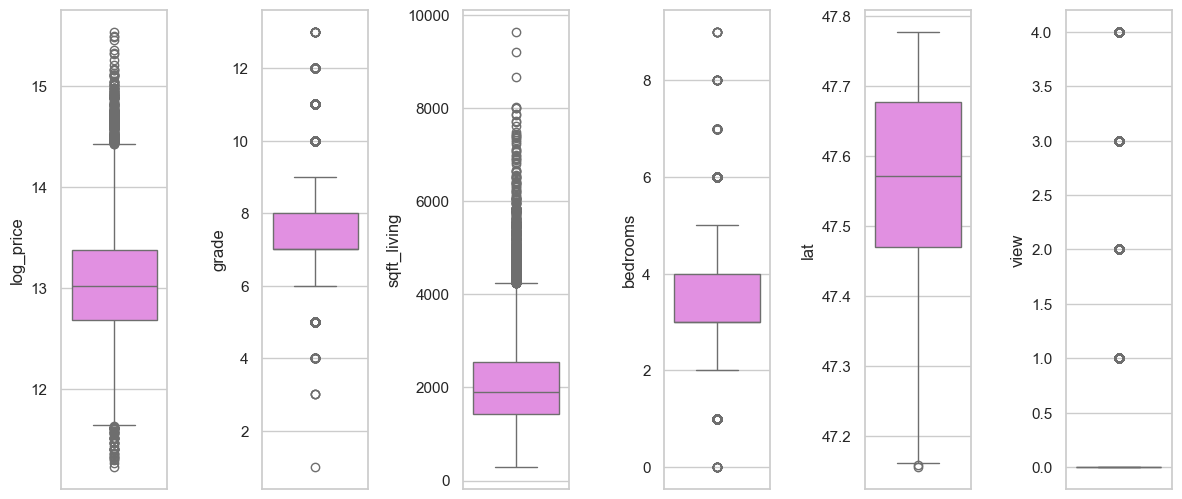

In [18]:
# D. Exploratory data analysis

# --- 6. Drop outliers (bedrooms)  --- 
#df2=df1.drop(outliers_bed.index,axis=0)

all_outlier_indices = outliers_bed.index.union(outliers_sqft.index)

# 2. Drop the combined indices from the original DataFrame df1
df2 = df1.drop(all_outlier_indices, axis=0)

# --- 7. Boxplot on selected features and log price on df2 --- 
# Verified that outliers are dropped from bedrooms boxplot

df2 = df2[['log_price','grade','sqft_living','bedrooms','lat','view']] 
l = df2.columns.values
no_cols=8
total_plots = len(l)
#no_rows = math.ceil(total_plots / no_cols)
no_rows=round(len(l)-1/no_cols)
grid_rows = no_rows

#plt.figure(figsize=(no_cols,5*no_rows))
plt.figure(figsize=(2*no_cols, 5 * grid_rows))

for i in range (0,total_plots):
    plt.subplot(grid_rows, no_cols, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(df2[l[i]],color='violet',orient='v')
    plt.tight_layout()
df2.shape

In [19]:
# E. Perform Train - Test split

# --- 1. Split into Train and test data set ---
# Y is log_price and X are selected features 

df_train, df_test = train_test_split(df2, test_size=0.3, random_state=9009)

X_train = df_train
y_train = df_train['log_price']

X_test = df_test[['grade','sqft_living','bedrooms','lat','view']]      
y_test = df_test['log_price']
print("-"*15,"X_Test wo sqft_scaled","-"*15)
print(X_test.head(2))

# ----------------------  Standard Scaler  -------------------  
# Applied Standard scaler to sqft_living for Train & Test datasets 

# --- 2. Scaled the sqft_living in Train data ---
sqft_scale = X_train[['sqft_living']]
X_train_scaled = scaler.fit_transform(sqft_scale)

# 3. Transform  the sqft_living in Test data (do not apply standard scaler)
X_test_scaled = scaler.transform(X_test[['sqft_living']])

# 4. Flatten (or combine) standard scaled columns into Train - Test datasets 
X_train['sqft_scaled'] = X_train_scaled.flatten()
X_test['sqft_scaled'] = X_test_scaled.flatten()
X_test.drop(columns=['sqft_living'], axis=1)

# 5. Print X_train and X_test 
print("-"*25,"X_Train","-"*40)
print(X_train.head(2))
print("-"*25,"X_Test","-"*30)
print(X_test.head(2))

--------------- X_Test wo sqft_scaled ---------------
       grade  sqft_living  bedrooms      lat  view
15562      7         1870         4  47.6437     0
7122       7         1300         2  47.6134     2
------------------------- X_Train ----------------------------------------
       log_price  grade  sqft_living  bedrooms      lat  view  sqft_scaled
16416  12.679196      7         1300         4  47.5029     0    -0.850410
20555  12.846610      8         2560         4  47.3404     0     0.525065
------------------------- X_Test ------------------------------
       grade  sqft_living  bedrooms      lat  view  sqft_scaled
15562      7         1870         4  47.6437     0    -0.228171
7122       7         1300         2  47.6134     2    -0.850410


In [20]:
# F. Multi-linear Regression Model 

# --- 1. Create the Model ---
# --- 2. Train the model ---
model_scaled= ols('log_price ~ sqft_scaled + bedrooms + lat + view + grade', X_train).fit() 
print(model_scaled.summary())
print()

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     8025.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:22:42   Log-Likelihood:                -2021.0
No. Observations:               15122   AIC:                             4054.
Df Residuals:                   15116   BIC:                             4100.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -58.6093      0.779    -75.263      

In [21]:
# --- 3. Predict on test data ---
y_pred = model_scaled.predict(X_test)

# ----------------- LOG-SCALE EVALUATION -----------------

#4. Calculate MSE and RMSE in LOG scale (model comparison)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE of test data : {mse:.4f}")
print(f"RMSE of test data : {rmse:.4f}") #values are at log
print()

# ----------------------  Original Price scale evaluation -------------------  

# 5. Revert actual/expected test prices from log scale to original price scale 
y_test_org = np.exp(y_test)

# 6. Revert predicted prices from log scale to original price scale (e.g., dollars)
y_pred_org = np.exp(y_pred)

# 7. Calculate MSE and RMSE on the original price values
mse_org = mean_squared_error(y_test_org, y_pred_org)
rmse_org = np.sqrt(mse_org)

print("--------------- Multi-Linear Regression Evaluation -----------------")
print()
print(f"MSE of test data (Original Price) : {mse_org:,.0f}")
print(f"RMSE of test data (Original Price) : ${rmse_org:,.2f}")

MSE of test data : 0.0751
RMSE of test data : 0.2740

--------------- Multi-Linear Regression Evaluation -----------------

MSE of test data (Original Price) : 39,140,374,572
RMSE of test data (Original Price) : $197,839.26


In [22]:
# G. Regularization
model = Ridge()

#  --- 1. Create list of tuning hyperparameters and GridSearch --- 
hyperparameter_space = {'alpha': [0.3,0.4,0.5] # closer to 1
                        } 
grid_R = GridSearchCV(estimator=model, param_grid=hyperparameter_space, cv=5) 

# --- 2. Train the model ---
X_train_R =X_train.drop(columns=['log_price'], axis=1)
grid_R.fit(X_train_R, y_train) 
print('The best alpha:', grid_R.best_estimator_.alpha) 

# --- 3. Predict on test data ---
y_pred_Reg = grid_R.best_estimator_.predict(X_test)
print()

# ----------------- LOG-SCALE EVALUATION -----------------

#4. Calculate MSE and RMSE in LOG scale (model comparison)
mse_Reg = mean_squared_error(y_test, y_pred_Reg)
rmse_Reg = np.sqrt(mse_Reg)

print(f"MSE on test data (Log Scale): {mse_Reg:.4f}")
print(f"RMSE on test data (Log Scale): {rmse_Reg:.4f}")
print()

# ----------------  Original Price scale evaluation -------------------  

# 5. Revert actual/expected test prices from log scale to original price scale 
y_test_org = np.exp(y_test)

# 6. Revert predicted prices from log scale to original price scale (e.g., dollars)
y_pred_Reg_org = np.exp(y_pred_Reg)

# 7. Calculate MSE and RMSE on the original price values
mse_org_Reg = mean_squared_error(y_test_org, y_pred_Reg_org)
rmse_org_Reg = np.sqrt(mse_org_Reg)

print("------------- Regularization ---------------")
print()
print(f"MSE on test data (Original Price) : {mse_org_Reg:,.0f}")
print(f"RMSE on test data (Original Price) : ${rmse_org_Reg:,.2f}")

The best alpha: 0.3

MSE on test data (Log Scale): 0.0751
RMSE on test data (Log Scale): 0.2740

------------- Regularization ---------------

MSE on test data (Original Price) : 39,138,769,496
RMSE on test data (Original Price) : $197,835.21


In [23]:
# H. Support Vector Regression
from sklearn.svm import SVR

#--- 1. Create the SVR Model ---
#  IMPT: Must drop Y variable (log_price) from X_train for SVR model to function.
model_SVR = SVR() 
X_train_SVR = X_train.drop(columns=['log_price'], axis=1)

# --- 2. Train the model ---
model_SVR.fit(X_train_SVR, y_train)

# --- 3. Predict on test data ---
expected = y_test
predicted = model_SVR.predict(X_test) 

# ----------------- LOG-SCALE EVALUATION -----------------
#4. Calculate MSE and RMSE in LOG scale (model comparison)
mse = mean_squared_error(expected, predicted)
rmse = np.sqrt(mse)
print(f"MSE of test data (Log Scale) : {mse:.3f}")
print(f"RMSE of test data (Log Scale): {rmse:.3f}")
print()

# ----------------  Original Price scale evaluation -------------------  

# 5. Revert actual test prices from log scale to original price scale 
expected_org = np.exp(y_test)

# 6. Revert predicted prices from log scale to original price scale (e.g., dollars)
predicted_org = np.exp(predicted)

# 7. Calculate MSE and RMSE on the original price values
mse_org_svc = mean_squared_error(expected_org, predicted_org)
rmse_org_svc = np.sqrt(mse_org_svc)

print("----- Support Vector Machine Evaluation -----")
print()
print(f"MSE on test data (Original Price) : {mse_org_svc:,.0f}")
print(f"RMSE on test data (Original Price) : ${rmse_org_svc:,.2f}")

MSE of test data (Log Scale) : 0.141
RMSE of test data (Log Scale): 0.375

----- Support Vector Machine Evaluation -----

MSE on test data (Original Price) : 61,375,860,163
RMSE on test data (Original Price) : $247,741.52


In [24]:
# I. Random Forest Regressor Model
# --- 0. Data pre-processing for Random Forest Regressor (rf) and Gradient Boosting Regressor (GBR)
# --- ASSUMPTIONS ---
# Remove standard scale and log prices from Train and Test data which affect rf and GBR model results

X_train_rf=X_train.drop(columns=['log_price','sqft_scaled'],axis=1) #removed view but the RMSE fell for both rf and GBR model
X_test_rf=X_test.drop(columns=['sqft_scaled'],axis=1)

#print train and test data sets to confirm columns alignment

print(X_train_rf.columns)
print(X_test_rf.columns)

Index(['grade', 'sqft_living', 'bedrooms', 'lat', 'view'], dtype='object')
Index(['grade', 'sqft_living', 'bedrooms', 'lat', 'view'], dtype='object')


In [25]:
# I. Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor

# --- 1. Create the rf Model ---
rf = RandomForestRegressor(
    n_estimators=100,       # number of trees = more takes longer to compute
    max_depth=None,         # none = let trees grow fully
    min_samples_split=2,
    random_state=42
)

# --- 2. Train the model ---
rf.fit(X_train_rf, y_train)

# --- 3. Predict on test data ---
y_pred_rf = rf.predict(X_test_rf)

# ----------------- LOG-SCALE EVALUATION -----------------

# 4. Calculate MSE and RMSE in LOG scale (model comparison)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# ----------------  Original Price scale evaluation -------------------  
# 5. Calculate MSE and RMSE on the original price 
y_test_org = np.exp(y_test)
y_pred_rf_org = np.exp(y_pred_rf)

# 6. Revert predicted prices from log scale
mse_org = mean_squared_error(y_test_org, y_pred_rf_org)
rmse_org = np.sqrt(mse_org)
print()

# 7. Calculate MSE and RMSE on the original price values
print("------ Random Forest Evaluation ----- ")
print(f"MSE on test data (Original Price) : {mse_org:,.0f}")
print(f"RMSE on test data (Original Price) : ${rmse_org:,.2f}")

MSE: 0.0519
RMSE: 0.2277

------ Random Forest Evaluation ----- 
MSE on test data (Original Price) : 28,092,143,578
RMSE on test data (Original Price) : $167,607.11


In [26]:
# J. Gradient Boosting Regressor (GBR)

# --- 1. Create the GBR Model ---
gbr = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=4, 
    random_state=42
)

# --- 2. Train the model ---
gbr.fit(X_train_rf, y_train) 

# --- 3. Predict on test data ---
y_pred_log_gbr = gbr.predict(X_test_rf) 

# ----------------- LOG-SCALE EVALUATION -----------------
#4. Calculate MSE and RMSE in LOG scale (model comparison)
mse_log_gbr = mean_squared_error(y_test, y_pred_log_gbr)
rmse_log_gbr = np.sqrt(mse_log_gbr)

print("--- Gradient Boosting Regressor Evaluation ---")
print()
print(f"MSE (Log Scale): {mse_log_gbr:.4f}")
print(f"RMSE (Log Scale): {rmse_log_gbr:.4f}")

# ----------------- ORIGINAL PRICE SCALE EVALUATION -----------------

# 5. Revert actual/expected test prices from log scale to original price scale 
y_test_original = np.exp(y_test)

# 6. Revert predicted prices from log scale to original price scale 
y_pred_original_gbr = np.exp(y_pred_log_gbr)

# 7. Calculate RMSE on the original price values (in dollars)
rmse_original_gbr = np.sqrt(mean_squared_error(y_test_original, y_pred_original_gbr))
print(f"RMSE (Original Scale): ${rmse_original_gbr:,.2f}")

--- Gradient Boosting Regressor Evaluation ---

MSE (Log Scale): 0.0468
RMSE (Log Scale): 0.2164
RMSE (Original Scale): $161,777.08


In [27]:
# K. Tuning GBR hyperparameters 
model = GradientBoostingRegressor()

#  --- 1. Create list of tuning hyperparameters and GridSearch --- 
#  learning rate closer to 1 means higher learning rate and higher chance to overfit 
#  tried learning rate from 0.1 to 0.4, MSE and RMSE range are unchanged at 0.0471/0.0274 - only RMSE $ fell slightly.

hyperparameter_spac = {'learning_rate':[0.4,0.5,0.6] 
                        } 

# --- 2. Train the model ---
# Identify best estimator on learning rate 
grid_GBR = GridSearchCV(estimator=model, param_grid=hyperparameter_spac, cv=5) 
grid_GBR.fit(X_train_rf, y_train) 

print('The best estimator:', grid_GBR.best_estimator_.learning_rate) 

# --- 3. Predict on test data ---
y_pred_GBR = grid_GBR.best_estimator_.predict(X_test_rf)
print()

# ----------------- LOG-SCALE EVALUATION -----------------

# 4. Calculate MSE and RMSE in LOG scale (model comparison)
mse_GBR = mean_squared_error(y_test, y_pred_GBR)
rmse_GBR = np.sqrt(mse_Reg)

print("--- Gradient Boosting Regressor with tuning to hyperparameters evaluation ---")
print()
print(f"MSE on test data (Log Scale): {mse_GBR:.4f}")
print(f"RMSE on test data (Log Scale): {rmse_GBR:.4f}") #Results are not better than original GBR model.

#y_pred_original_GBR = np.exp(y_pred_log_gbr)
y_pred_original_GBR = np.exp(y_pred_GBR)
rmse_original_GBR = np.sqrt(mean_squared_error(y_test_original, y_pred_original_GBR))
print(f"RMSE (Original Scale): ${rmse_original_GBR:,.2f}")

The best estimator: 0.4

--- Gradient Boosting Regressor with tuning to hyperparameters evaluation ---

MSE on test data (Log Scale): 0.0471
RMSE on test data (Log Scale): 0.2740
RMSE (Original Scale): $161,015.88
